In [1]:
print('HELLO')

HELLO


In [2]:
import pandas as pd
# Generate external time series.
def generate_external_time_series(file_path, window=1) -> pd.DataFrame:
    # Load Dataframe 
    df = pd.read_csv(file_path)
    df = df.drop(['Unnamed: 0'],axis=1)
    df['date'] = pd.to_datetime(df['date'])
    df['HashRate'] = df['HashRate'].rolling(window=window,center=True).mean()
    df['PriceUSD'] = df['PriceUSD'].rolling(window=window,center=True).mean()
    return df

def generate_global_time_series(file_path) -> pd.DataFrame:
    # Load Dataframe 
    df = pd.read_csv(file_path)
    df["date"] = df["year"].astype(str) +"-" + df["month"].astype(str)+ "-" + df["day"].astype(str)
    df['date'] = pd.to_datetime(df['date'])
    
    # Drop 'Unnamed: 0', 'year', 'month', 'day'
    df = df.drop(['Unnamed: 0', 'year', 'month', 'day'], axis=1)
    
    # Put date at first column
    date_col = df.pop('date')
    df.insert(0,'date',date_col)
    return df


In [3]:
#generate_external_time_series('timeseries/external.csv')
print('42')

42


In [4]:
#generate_global_time_series('timeseries/global.csv')
print('42')

42


In [5]:
ext = generate_external_time_series('timeseries/external.csv')
print(ext)

          date     PriceUSD      HashRate
0   2015-01-02   315.942732  3.333450e+05
1   2015-01-03   285.647310  3.272842e+05
2   2015-01-04   263.334575  3.474869e+05
3   2015-01-05   275.003852  3.151626e+05
4   2015-01-06   287.549521  3.192031e+05
..         ...          ...           ...
906 2017-06-26  2426.365051  5.023770e+06
907 2017-06-27  2530.345536  4.634604e+06
908 2017-06-28  2562.792264  5.554450e+06
909 2017-06-29  2540.443032  4.245439e+06
910 2017-06-30  2452.712064  5.448314e+06

[911 rows x 3 columns]


In [6]:
def compare_inflation_par_mois(df, window=1) -> pd.DataFrame:
    # Convertir la colonne 'date' en type datetime
    df['date'] = pd.to_datetime(df['date'])

    # Créer une colonne avec la date de l'année d'avant
    df['date_annee_derniere'] = df['date'] - pd.DateOffset(years=1)
    # Fusionner le dataframe avec lui-même en utilisant la colonne 'date_annee_derniere'
    merged_df = pd.merge(df, df[['date', 'PriceUSD']], left_on='date_annee_derniere', right_on='date', suffixes=('', '_annee_derniere'))

    # Calculer l'évolution du prix par rapport à l'année d'avant
    merged_df['evolution_prix_an'] = (merged_df['PriceUSD'] - merged_df['PriceUSD_annee_derniere']) / merged_df['PriceUSD_annee_derniere']

    # Sélectionner les colonnes nécessaires
    result_df = merged_df[['date', 'PriceUSD', 'evolution_prix_an']]

    return result_df

In [7]:
ext = generate_external_time_series('timeseries/external.csv')

compare_inflation_par_mois(ext)

,date,PriceUSD,evolution_prix_an
0,2016-01-02,434.439877,0.375059
1,2016-01-03,430.136180,0.505830
2,2016-01-04,433.448971,0.646001
3,2016-01-05,432.669503,0.573322
4,2016-01-06,430.677870,0.497752
...,...,...,...
541,2017-06-26,2426.365051,2.848720
542,2017-06-27,2530.345536,2.879441
543,2017-06-28,2562.792264,2.959700
544,2017-06-29,2540.443032,2.978229


In [8]:
def compare_inflation_par_jour(df, window=1) -> pd.DataFrame:
    # Convertir la colonne 'date' en type datetime
    df['date'] = pd.to_datetime(df['date'])

    # Créer une colonne avec la date de l'année d'avant
    df['date_jour_dernier'] = df['date'] - pd.DateOffset(days=1)
    # Fusionner le dataframe avec lui-même en utilisant la colonne 'date_jour_dernier'
    merged_df = pd.merge(df, df[['date', 'PriceUSD']], left_on='date_jour_dernier', right_on='date', suffixes=('', '_jour_dernier'))

    # Calculer l'évolution du prix par rapport à l'année d'avant
    merged_df['evolution_prix_jour'] = (merged_df['PriceUSD'] - merged_df['PriceUSD_jour_dernier']) / merged_df['PriceUSD_jour_dernier']

    # Sélectionner les colonnes nécessaires
    result_df = merged_df[['date', 'PriceUSD', 'evolution_prix_an', 'evolution_prix_jour']]

    return result_df

In [58]:
ext = generate_external_time_series('timeseries/external.csv')

int = compare_inflation_par_mois(ext)
#int = generate_external_time_series('timeseries/external.csv')

ret = compare_inflation_par_jour(int)

In [10]:
def ratio(result_df):
    result_df['ratio'] = (result_df['evolution_prix_an'] / result_df['evolution_prix_jour'])
    return result_df

In [11]:
ratio(ret)
#print(ret['ratio'].sum())

,date,PriceUSD,evolution_prix_an,evolution_prix_jour,ratio
0,2016-01-03,430.136180,0.505830,-0.009906,-51.061342
1,2016-01-04,433.448971,0.646001,0.007702,83.877430
2,2016-01-05,432.669503,0.573322,-0.001798,-318.814271
3,2016-01-06,430.677870,0.497752,-0.004603,-108.133433
4,2016-01-07,459.208940,0.543375,0.066247,8.202271
...,...,...,...,...,...
540,2017-06-26,2426.365051,2.848720,-0.028572,-99.704922
541,2017-06-27,2530.345536,2.879441,0.042854,67.191224
542,2017-06-28,2562.792264,2.959700,0.012823,230.811071
543,2017-06-29,2540.443032,2.978229,-0.008721,-341.514344


In [62]:
"""
def compare_inflation_par_mixte(df, window=1) -> pd.DataFrame:
    # Convertir la colonne 'date' en type datetime
    df['date'] = pd.to_datetime(df['date'])

    # Créer une colonne avec la date de l'année d'avant
    df['date_annee_derniere'] = df['date'] - pd.DateOffset(years=1)
    # Créer une colonne avec la date du jour d'avant
    df['date_jour_dernier'] = df['date'] - pd.DateOffset(days=1)

    # Fusionner le dataframe avec lui-même en utilisant la colonne 'date_annee_derniere'
    merged_df = pd.merge(df, df[['date', 'PriceUSD']], left_on='date_annee_derniere', right_on='date', suffixes=('', '_annee_derniere'))
    # Fusionner le dataframe avec lui-même en utilisant la colonne 'date_jour_dernier'
    mergedj_df = pd.merge(df, df[['date', 'PriceUSD']], left_on='date_jour_dernier', right_on='date', suffixes=('', '_jour_dernier'))

    # Calculer l'évolution du prix par rapport à l'année d'avant
    merged_df['evolution_prix_an'] = (merged_df['PriceUSD'] - merged_df['PriceUSD_annee_derniere']) / merged_df['PriceUSD_annee_derniere']
    # Calculer l'évolution du prix par rapport à l'année d'avant
    mergedj_df['evolution_prix_jour'] = (mergedj_df['PriceUSD'] - mergedj_df['PriceUSD_jour_dernier']) / mergedj_df['PriceUSD_jour_dernier']


    # Sélectionner les colonnes nécessaires
    result_df = mergedj_df[['date', 'PriceUSD', 'evolution_prix_jour']]
    #result_df = mergedj_df[['date', 'PriceUSD', 'evolution_prix_an', 'evolution_prix_jour']]

    print(merged_df)
    print(result_df)
    # Fusionner le dataframe avec lui-même en utilisant la colonne
    result_df_tot = pd.merge(result_df, merged_df[['evolution_prix_an']])
    
    #return result_df
    return result_df_tot
"""
print('42')

42


In [64]:
"""ext = generate_external_time_series('timeseries/external.csv')

df = compare_inflation_par_mixte(ext)"""
print("42")

42


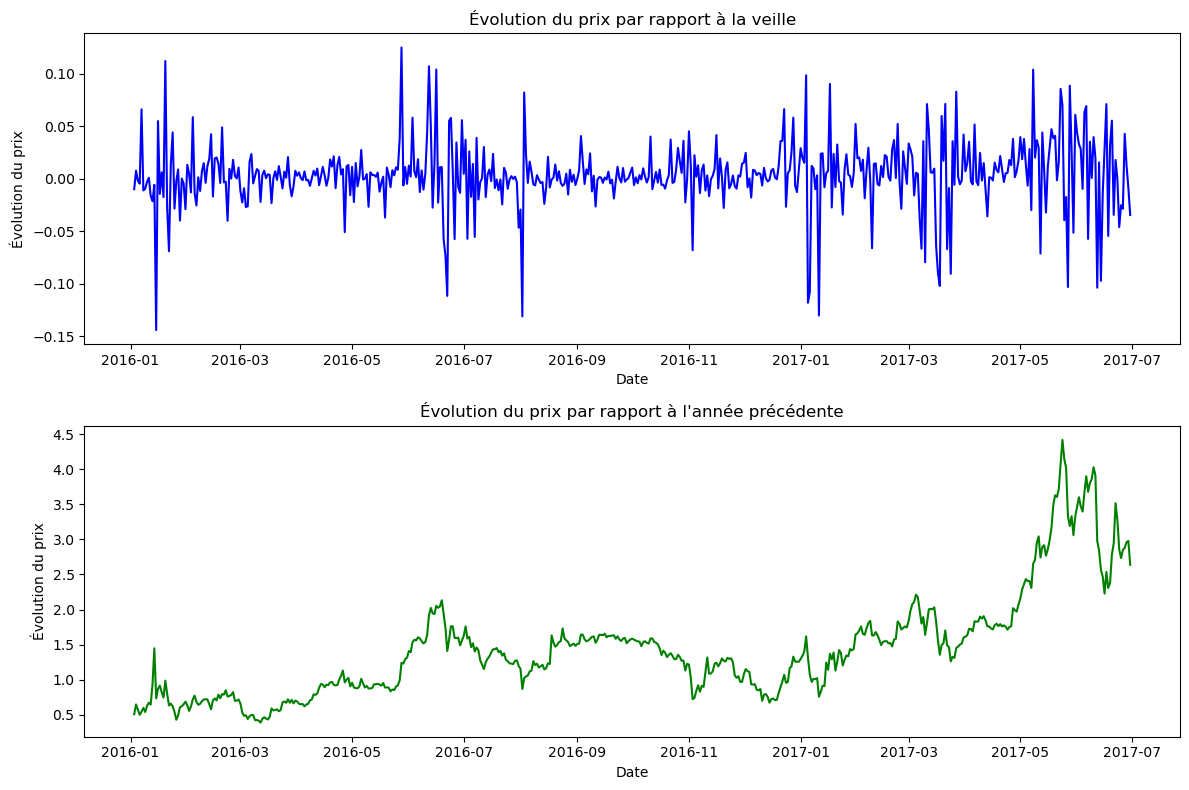

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

df=ret
# Création d'une figure avec deux sous-graphes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Tracé du premier sous-graphe
axs[0].plot(df['date'], df['evolution_prix_jour'], color='blue')
axs[0].set_title('Évolution du prix par rapport à la veille')
axs[0].set_ylabel('Évolution du prix')
axs[0].set_xlabel('Date')

# Tracé du deuxième sous-graphe
axs[1].plot(df['date'], df['evolution_prix_an'], color='green')
axs[1].set_title('Évolution du prix par rapport à l\'année précédente')
axs[1].set_ylabel('Évolution du prix')
axs[1].set_xlabel('Date')

# Affichage du graphe
plt.tight_layout()
plt.show()

        Unnamed: 0     PriceUSD      HashRate
count   911.000000   911.000000  9.110000e+02
mean   2645.000000   630.097047  1.519837e+06
std     263.127346   527.927985  1.306123e+06
min    2190.000000   175.637641  2.579295e+05
25%    2417.500000   268.092043  3.957344e+05
50%    2645.000000   437.775873  1.227547e+06
75%    2872.500000   733.149681  2.011795e+06
max    3100.000000  2974.214559  5.687700e+06


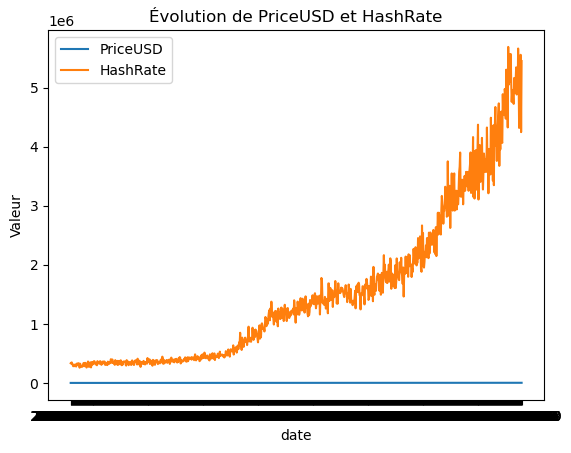

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV contenant les données
df = pd.read_csv('timeseries/external.csv')#, parse_dates=['Date'])

# Afficher les statistiques descriptives du dataset
print(df.describe())

# Tracer les courbes des deux séries temporelles
fig, ax = plt.subplots()
ax.plot(df['date'], df['PriceUSD'], label='PriceUSD')
ax.plot(df['date'], df['HashRate'], label='HashRate')
ax.set_xlabel('date')
ax.set_ylabel('Valeur')
ax.set_title('Évolution de PriceUSD et HashRate')
ax.legend()
plt.show()

   Unnamed: 0        date    PriceUSD       HashRate
0        2190  2015-01-02  315.942732  333345.017260
1        2191  2015-01-03  285.647310  327284.198765
2        2192  2015-01-04  263.334575  347486.927083
3        2193  2015-01-05  275.003852  315162.561773
4        2194  2015-01-06  287.549521  319203.107437


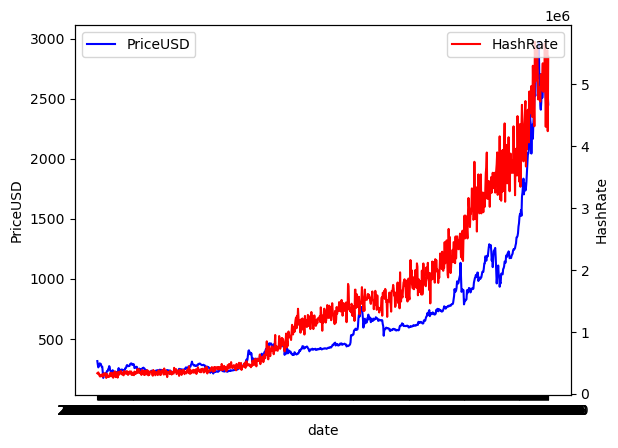

In [32]:
# Charger les données depuis le fichier csv
df = pd.read_csv("timeseries/external.csv")

# Afficher les premières lignes du dataframe
print(df.head())

# Créer la figure et les axes
fig, ax1 = plt.subplots()

# Définir l'échelle de la première courbe PriceUSD
ax1.set_xlabel("date")
ax1.set_ylabel("PriceUSD")
ax1.plot(df["date"], df["PriceUSD"], color="blue")

# Création des axes pour la deuxième courbe HashRate
ax2 = ax1.twinx()
ax2.set_ylabel("HashRate")
ax2.plot(df["date"], df["HashRate"], color="red")

# Affichage des légendes pour les courbes
ax1.legend(['PriceUSD'], loc='upper left')
ax2.legend(['HashRate'], loc='upper right')

# Affichage de la figure
plt.show()

In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Charger les données
data = pd.read_csv("timeseries/external.csv")
print(data)
print(data.dtypes)
data['date'] = (pd.to_datetime(data['date']).astype(int) / 10**9).astype(float)

# Séparer les caractéristiques et la variable cible
X = data.drop(columns=['PriceUSD'])
y = data['PriceUSD']

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs de l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

     Unnamed: 0        date     PriceUSD      HashRate
0          2190  2015-01-02   315.942732  3.333450e+05
1          2191  2015-01-03   285.647310  3.272842e+05
2          2192  2015-01-04   263.334575  3.474869e+05
3          2193  2015-01-05   275.003852  3.151626e+05
4          2194  2015-01-06   287.549521  3.192031e+05
..          ...         ...          ...           ...
906        3096  2017-06-26  2426.365051  5.023770e+06
907        3097  2017-06-27  2530.345536  4.634604e+06
908        3098  2017-06-28  2562.792264  5.554450e+06
909        3099  2017-06-29  2540.443032  4.245439e+06
910        3100  2017-06-30  2452.712064  5.448314e+06

[911 rows x 4 columns]
Unnamed: 0      int64
date           object
PriceUSD      float64
HashRate      float64
dtype: object


KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'